MEM T380

Case Studies Group 10

Ante Sokosa  
Ziad Hatab

HW2C

# 1 &nbsp; `Data Exploration`

Data exploration has been previously explained, discussed, and completed in HW2A+B.  
We are importing this data as explored, cleaned, and prepared with subsets combined.

In [2]:
import pandas as pd

excel_file = 'weld_defect_dataset_cleaned_prepared_and_subsets_combined.xlsx'
df = pd.read_excel(excel_file)
df

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc,type,type_num,CR,LF,LP,PO,SL
0,0.008596,0.006897,0.5748,0.838397,0.998562,0.091802,0.908459,0.003151,0.111302,0.256742,0.389952,PO,3,0,0,0,1,0
1,0.010029,0.003448,0.4112,0.838397,0.649317,0.039172,0.476520,0.002817,0.121299,0.332611,0.443785,PO,3,0,0,0,1,0
2,0.007163,0.003448,0.4400,1.007173,0.754309,0.048079,0.766430,0.002621,0.127759,0.323068,0.444515,PO,3,0,0,0,1,0
3,0.028653,0.003448,0.3124,0.534599,0.061617,0.244800,0.789110,0.010007,0.092632,0.220312,0.339685,PO,3,0,0,0,1,0
4,0.018625,0.003448,0.4024,0.557089,0.037346,0.578774,0.630554,0.006757,0.073914,0.270908,0.273045,PO,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.277937,0.949262,1.0268,0.102869,0.723013,0.025025,0.468658,0.101296,0.757683,0.231426,0.516244,CR,0,1,0,0,0,0
215,0.148997,0.720690,0.8172,0.055527,0.509504,0.135456,0.551284,0.010890,0.262126,0.410800,0.530843,CR,0,1,0,0,0,0
216,0.320917,0.846359,0.7100,0.106793,0.407912,0.027538,0.488077,0.191586,0.757547,0.158517,0.559012,CR,0,1,0,0,0,0
217,0.322350,0.578386,0.6420,0.143629,0.384393,0.039732,0.492730,0.154902,0.640716,0.218541,0.567931,CR,0,1,0,0,0,0


For Reference: 

`Defect Features:`

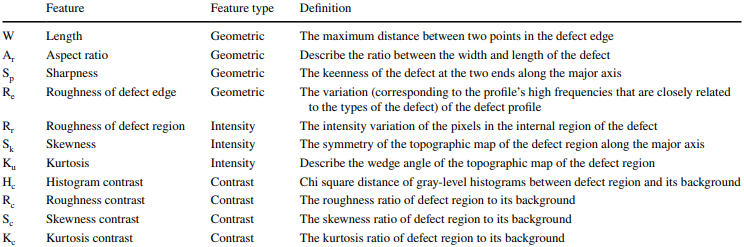

`Defect Types:`  
- `CR` = crack
- `LF` = lack of fusion
- `LP` = lack of penetration
- `PO` = porosity
- `SL` = slag inclusion

Useing `.info()` and `.describe()` for data confirmation and reference:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   w         219 non-null    float64
 1   ar        219 non-null    float64
 2   sp        219 non-null    float64
 3   re        219 non-null    float64
 4   rr        219 non-null    float64
 5   sk        219 non-null    float64
 6   ku        219 non-null    float64
 7   hc        219 non-null    float64
 8   rc        219 non-null    float64
 9   sc        219 non-null    float64
 10  kc        219 non-null    float64
 11  type      219 non-null    object 
 12  type_num  219 non-null    int64  
 13  CR        219 non-null    int64  
 14  LF        219 non-null    int64  
 15  LP        219 non-null    int64  
 16  PO        219 non-null    int64  
 17  SL        219 non-null    int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 30.9+ KB


In [4]:
df.select_dtypes(include=['float64']).describe()


,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.176636,0.208510,0.599917,0.391446,0.249936,0.167753,0.604430,0.092718,0.216547,0.240620,0.478471
std,0.192585,0.256884,0.216652,0.265466,0.208867,0.164427,0.151247,0.138793,0.173341,0.143348,0.150952
min,0.001433,0.003448,0.025200,0.000591,0.000118,0.001608,0.168895,0.000013,0.004129,0.001474,0.028573
25%,0.037250,0.012357,0.415600,0.131266,0.087341,0.064804,0.519690,0.012782,0.108342,0.145656,0.371903
50%,0.078797,0.062834,0.587200,0.409072,0.214041,0.112573,0.570744,0.034153,0.158479,0.215147,0.482290
75%,0.277937,0.363793,0.826800,0.602742,0.341661,0.199904,0.669316,0.113712,0.254108,0.318871,0.572080
max,1.000000,1.037931,1.026800,1.007173,1.003975,1.002376,1.202949,1.049198,1.001281,1.000876,1.025173


# 2 &nbsp; `Classification with Ensemble Algorithms`

We will begin by splitting our data into training and testing sets, using a 20% test size:

In [5]:
X = df.select_dtypes(include=['float64'])
y = df['type_num']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test  shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test  shape: {y_test.shape}')

X_train shape: (175, 11)
X_test  shape: (44, 11)
y_train shape: (175,)
y_test  shape: (44,)


Imports necessary for all models:

In [6]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 &nbsp; `Models`

### 2.1.1 &nbsp; `Random Forest`

We will create a Random Forest classifier and experiment with different values for `n_estimators`, `max_depth`, and `criterion` using `GridSearchCV`:

Gini Best Params: {'max_depth': 10, 'n_estimators': 500} Score: 0.9316993464052288
Entropy Best Params: {'max_depth': 10, 'n_estimators': 500} Score: 0.9313725490196079


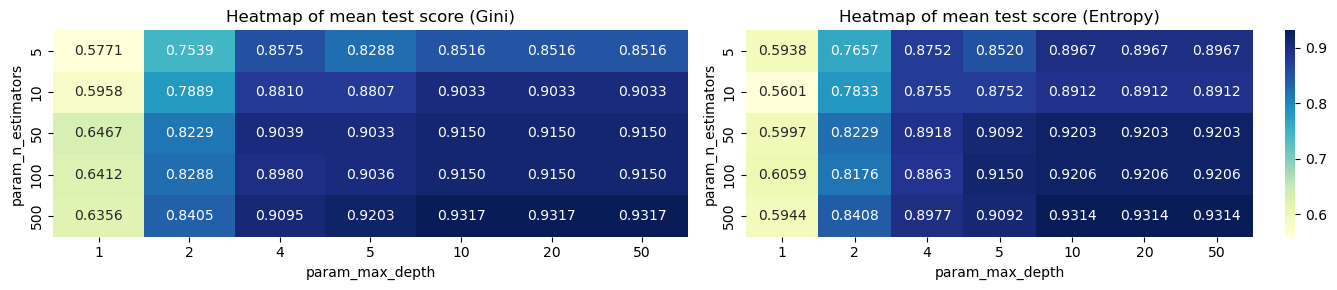

In [7]:
from sklearn.ensemble import RandomForestClassifier

# set parameters
n_estimators = [5, 10, 50, 100, 500]
max_depth = [1, 2, 4, 5, 10, 20, 50]
rfc_params = dict(n_estimators=n_estimators, max_depth=max_depth)

# create classifiers
rfc_gini    = RandomForestClassifier(criterion='gini'   , random_state=42)
rfc_entropy = RandomForestClassifier(criterion='entropy', random_state=42)

# create grids
rfc_gini_grid    = GridSearchCV(rfc_gini   , rfc_params, cv=10, scoring='accuracy')
rfc_entropy_grid = GridSearchCV(rfc_entropy, rfc_params, cv=10, scoring='accuracy')

# fit grids
rfc_gini_grid.fit(X_train, y_train)
rfc_entropy_grid.fit(X_train, y_train)

# print basic results
print(f'Gini Best Params: {rfc_gini_grid.best_params_} Score: {rfc_gini_grid.best_score_}')
print(f'Entropy Best Params: {rfc_entropy_grid.best_params_} Score: {rfc_entropy_grid.best_score_}')

# create dataframe from cv_results_
rfc_gini_results = pd.DataFrame(rfc_gini_grid.cv_results_)
rfc_entropy_results = pd.DataFrame(rfc_entropy_grid.cv_results_)

# pivot as prep for heatmap
rfc_gini_pivot = rfc_gini_results.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
rfc_entropy_pivot = rfc_entropy_results.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

# heatmap to visualize results
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 3))
sns.heatmap(rfc_gini_pivot, annot=True, cmap='YlGnBu', fmt='.4f', ax=ax1[0], cbar=False)
ax1[0].set_title('Heatmap of mean test score (Gini)')
sns.heatmap(rfc_entropy_pivot, annot=True, cmap='YlGnBu', fmt='.4f', ax=ax1[1])
ax1[1].set_title('Heatmap of mean test score (Entropy)')
plt.tight_layout()
plt.show()

We can see for both gini and entropy criterion, as both `max_depth` and `n_estimators` increase, the accuracy score increases as well. This is expected. However, we must not take too large of a value for these parameters, especially for `max_depth`, as this will lead to overfitting. We will use `max_depth=10`, `n_estimators=500` and `criterion=entropy` for our random forest model. This was determined through the grid search as a good balance between accuracy and overfitting. It reduces our parameter values as much as possible while still maintaining a high accuracy score. Note though that we have still not tested this on unseen data, our testing set. This will be done later and a better idea of the model's true performance will be known.

In [8]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

### 2.1.2 &nbsp; `Bagging`

We will create a Bagging classifier and experiment with different values for `n_estimators` using `GridSearchCV`:

Best Params: {'n_estimators': 10} Score: 0.9088235294117648


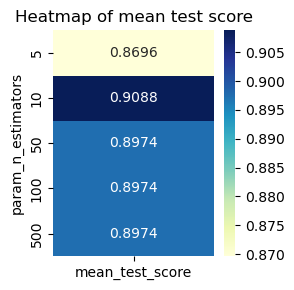

In [9]:
from sklearn.ensemble import BaggingClassifier

# set parameters
n_estimators = [5, 10, 50, 100, 500]
bag_params = dict(n_estimators=n_estimators)

# create classifier
bag = BaggingClassifier(random_state=42)

# create grid
bag_grid = GridSearchCV(bag, bag_params, cv=10, scoring='accuracy')

# fit grid
bag_grid.fit(X_train, y_train)

# print basic results
print(f'Best Params: {bag_grid.best_params_} Score: {bag_grid.best_score_}')

# create dataframe from cv_results_
bag_results = pd.DataFrame(bag_grid.cv_results_)

# pivot as prep for heatmap
bag_pivot = bag_results.pivot_table(index='param_n_estimators', values='mean_test_score')

# heatmap to visualize results
fig2, ax2 = plt.subplots(figsize=(3, 3))
sns.heatmap(bag_pivot, annot=True, cmap='YlGnBu', fmt='.4f', ax=ax2)
ax2.set_title('Heatmap of mean test score')
plt.tight_layout()
plt.show()


explanation

In [10]:
bag = BaggingClassifier(n_estimators=10, random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

### 2.1.3 &nbsp; `AdaBoost`

We will create an AdaBoost classifier and experiment with different values for `n_estimators` and `learning_rate` using `GridSearchCV`:

Best Params: {'learning_rate': 0.001, 'n_estimators': 500} Score: 0.669281045751634


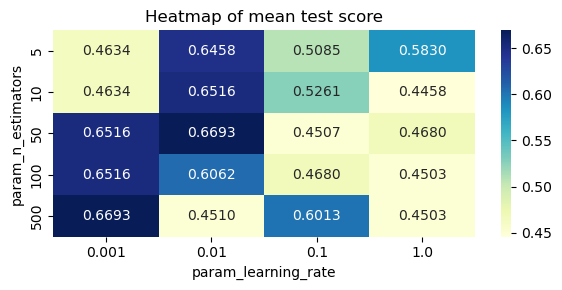

In [11]:
from sklearn.ensemble import AdaBoostClassifier

# set parameters
n_estimators = [5, 10, 50, 100, 500]
learning_rate = [0.001, 0.01, 0.1, 1.0]
ada_params = dict(n_estimators=n_estimators, learning_rate=learning_rate)

# create classifier
ada = AdaBoostClassifier(random_state=42)

# create grid
ada_grid = GridSearchCV(ada, ada_params, cv=10, scoring='accuracy')

# fit grid
ada_grid.fit(X_train, y_train)

# print basic results
print(f'Best Params: {ada_grid.best_params_} Score: {ada_grid.best_score_}')

# create dataframe from cv_results_
ada_results = pd.DataFrame(ada_grid.cv_results_)

# pivot as prep for heatmap
ada_pivot = ada_results.pivot_table(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

# heatmap to visualize results
fig3, ax3 = plt.subplots(figsize=(6, 3))
sns.heatmap(ada_pivot, annot=True, cmap='YlGnBu', fmt='.4f', ax=ax3)
ax3.set_title('Heatmap of mean test score')
plt.tight_layout()
plt.show()


explanation

In [12]:
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.001, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=500, random_state=42)

### 2.1.4 &nbsp; `Gradient Boosting`

We will create a Gradient Boosting classifier and experiment with different values for `n_estimators` and `learning_rate` using `GridSearchCV`:

Best Params: {'learning_rate': 0.1, 'n_estimators': 500} Score: 0.8921568627450981


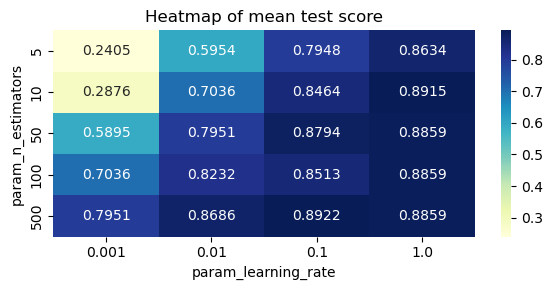

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# set parameters
n_estimators = [5, 10, 50, 100, 500]
learning_rate = [0.001, 0.01, 0.1, 1.0]
gbc_params = dict(n_estimators=n_estimators, learning_rate=learning_rate)

# create classifier
gbc = GradientBoostingClassifier(random_state=42)

# create grid
gbc_grid = GridSearchCV(gbc, gbc_params, cv=10, scoring='accuracy')

# fit grid
gbc_grid.fit(X_train, y_train)

# print basic results
print(f'Best Params: {gbc_grid.best_params_} Score: {gbc_grid.best_score_}')

# create dataframe from cv_results_
gbc_results = pd.DataFrame(gbc_grid.cv_results_)

# pivot as prep for heatmap
gbc_pivot = gbc_results.pivot_table(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

# heatmap to visualize results
fig4, ax4 = plt.subplots(figsize=(6, 3))
sns.heatmap(gbc_pivot, annot=True, cmap='YlGnBu', fmt='.4f', ax=ax4)
ax4.set_title('Heatmap of mean test score')
plt.tight_layout()
plt.show()

explanation

In [14]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

## 2.2 &nbsp; `Model Comparison`

Now that all the models have been fit to the training data with parameters we have determined should do well, we will see their performance on the testing data.

### 2.2.1 &nbsp; `Accuracies`

In [15]:
from sklearn.metrics import accuracy_score

y_pred_rfc = rfc.predict(X_test)
y_pred_bag = bag.predict(X_test)
y_pred_ada = ada.predict(X_test)
y_pred_gbc = gbc.predict(X_test)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_bag = accuracy_score(y_test, y_pred_bag)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_gbc = accuracy_score(y_test, y_pred_gbc)

# create dataframe of accuracy scores
acc_df = pd.DataFrame({'Model': ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'], 'Accuracy': [acc_rfc, acc_bag, acc_ada, acc_gbc]})
acc_df

,Model,Accuracy
0,Random Forest,0.886364
1,Bagging,0.886364
2,AdaBoost,0.659091
3,Gradient Boosting,0.886364


### 2.2.2 &nbsp; `Confusion Matrices`

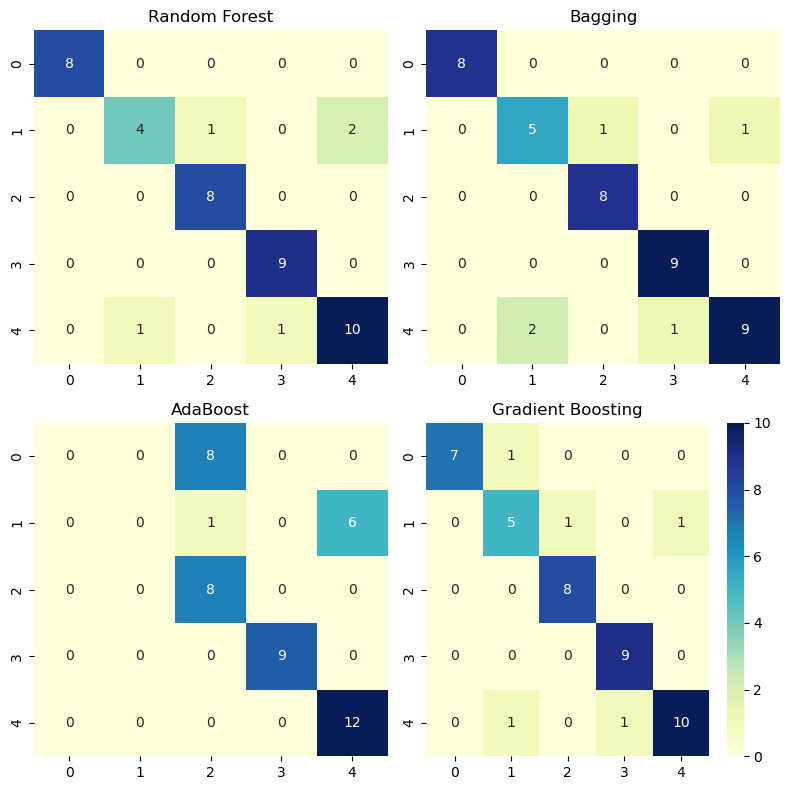

In [16]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_bag = confusion_matrix(y_test, y_pred_bag)
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# plot confusion matrices
fig5, ax5 = plt.subplots(2, 2, figsize=(8, 8))
sns.heatmap(cm_rfc, annot=True, cmap='YlGnBu', fmt='d', ax=ax5[0, 0], cbar=False)
ax5[0, 0].set_title('Random Forest')
sns.heatmap(cm_bag, annot=True, cmap='YlGnBu', fmt='d', ax=ax5[0, 1], cbar=False)
ax5[0, 1].set_title('Bagging')
sns.heatmap(cm_ada, annot=True, cmap='YlGnBu', fmt='d', ax=ax5[1, 0], cbar=False)
ax5[1, 0].set_title('AdaBoost')
sns.heatmap(cm_gbc, annot=True, cmap='YlGnBu', fmt='d', ax=ax5[1, 1])
ax5[1, 1].set_title('Gradient Boosting')
plt.tight_layout()
plt.show()

### 2.2.3 &nbsp; `Classification Reports`

In [17]:
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred_rfc))

which performs best and why

# 3 &nbsp; `Random Forests vs Decision Tree Classifiers`

# 4 &nbsp; `Evaluating Classifiers`